In this project we will calculate interest rate.Interest rate is our `Target variable` hence its a regression problem

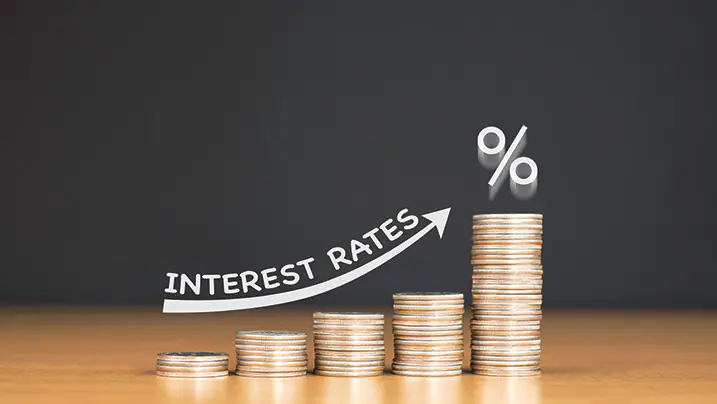

we will import library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'how-to-calculate-interest-on-savings-account-717x404.webp',
 'LoansData.csv',
 'lr on loan data.ipynb']

In [5]:
df=pd.read_csv('LoansData.csv')

In [6]:
df

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,1,20000.0,20000.00,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,2,19200.0,19200.00,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,3,35000.0,35000.00,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,4,10000.0,9975.00,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,5,12000.0,12000.00,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,0.17,60,debt_consolidation,0.19,MORTGAGE,9250.00,705.0,15.0,45880.0,1.0
2496,2497,16000.0,16000.00,0.14,60,home_improvement,0.22,OWN,8903.25,740.0,18.0,18898.0,1.0
2497,2498,10000.0,10000.00,0.14,36,debt_consolidation,0.05,MORTGAGE,2166.67,680.0,4.0,4544.0,0.0
2498,2499,6000.0,6000.00,0.12,36,major_purchase,0.17,RENT,3500.00,675.0,8.0,7753.0,0.0


In [7]:
df.shape

(2500, 13)

we have `2500 rows` and `13 columns`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LoanID                          2500 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Amount.Funded.By.Investors      2499 non-null   float64
 3   Interest.Rate                   2498 non-null   float64
 4   Loan.Length                     2500 non-null   int64  
 5   Loan.Purpose                    2500 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   CIBIL_Score                     2498 non-null   float64
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

* we have 2 objects only

In [9]:
df.drop(columns=['LoanID'],inplace=True)

## droping Loan id column 

In [10]:
df.drop(columns=['Amount.Funded.By.Investors'],inplace=True)

### droping amount funded by investor

In [11]:
df

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,10000.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.17,60,debt_consolidation,0.19,MORTGAGE,9250.00,705.0,15.0,45880.0,1.0
2496,16000.0,0.14,60,home_improvement,0.22,OWN,8903.25,740.0,18.0,18898.0,1.0
2497,10000.0,0.14,36,debt_consolidation,0.05,MORTGAGE,2166.67,680.0,4.0,4544.0,0.0
2498,6000.0,0.12,36,major_purchase,0.17,RENT,3500.00,675.0,8.0,7753.0,0.0


In [12]:
df.isnull().sum()

Amount.Requested                  1
Interest.Rate                     2
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              1
Home.Ownership                    1
Monthly.Income                    1
CIBIL_Score                       2
Open.CREDIT.Lines                 3
Revolving.CREDIT.Balance          3
Inquiries.in.the.Last.6.Months    3
dtype: int64

### we have null values in dataset

* treating amount.requested

In [13]:
df['Amount.Requested'].fillna(df['Amount.Requested'].mean(),inplace=True)

In [14]:
df['Amount.Requested'].isnull().sum()

0

* we are filling mean for null value in amount requested

<AxesSubplot:ylabel='Interest.Rate'>

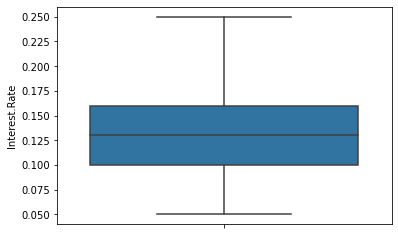

In [15]:
sns.boxplot(y=df['Interest.Rate'])

* we dont have any outlierrs in interest rate so we will fill it with mean

In [16]:
df['Interest.Rate'].fillna(df['Interest.Rate'].mean(),inplace=True)

In [17]:
df.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
CIBIL_Score                       float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
dtype: object

In [18]:
df['Debt.To.Income.Ratio'].fillna(df['Debt.To.Income.Ratio'].mean(),inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly.Income'>

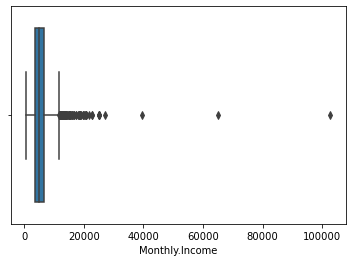

In [19]:
sns.boxplot(df['Monthly.Income'])

* we have missing values in data so we will fill median in monthly income

In [20]:
df['Monthly.Income'].fillna(df['Monthly.Income'].median(),inplace=True)

* we have missing values in cibil score and we have outlies as well so we are filling median in it

In [21]:
df['CIBIL_Score']=df['CIBIL_Score'].fillna(df['CIBIL_Score'].median())

In [22]:
df['Open.CREDIT.Lines']=df['Open.CREDIT.Lines'].fillna(df['Open.CREDIT.Lines'].median())

In [23]:
df['Revolving.CREDIT.Balance']=df['Revolving.CREDIT.Balance'].fillna(df['Revolving.CREDIT.Balance'].median())

In [24]:
df['Inquiries.in.the.Last.6.Months']=df['Inquiries.in.the.Last.6.Months'].fillna(df['Inquiries.in.the.Last.6.Months'].median())

* we have treated all null or missing values

In [25]:
df.isnull().sum()

Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
Home.Ownership                    1
Monthly.Income                    0
CIBIL_Score                       0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
dtype: int64

In [26]:
df

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,20000.0,0.09,36,debt_consolidation,0.15,MORTGAGE,6541.67,735.0,14.0,14272.0,2.0
1,19200.0,0.12,36,debt_consolidation,0.28,MORTGAGE,4583.33,715.0,12.0,11140.0,1.0
2,35000.0,0.22,60,debt_consolidation,0.24,MORTGAGE,11500.00,690.0,14.0,21977.0,1.0
3,10000.0,0.10,36,debt_consolidation,0.14,MORTGAGE,3833.33,695.0,10.0,9346.0,0.0
4,12000.0,0.12,36,credit_card,0.19,RENT,3195.00,695.0,11.0,14469.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.17,60,debt_consolidation,0.19,MORTGAGE,9250.00,705.0,15.0,45880.0,1.0
2496,16000.0,0.14,60,home_improvement,0.22,OWN,8903.25,740.0,18.0,18898.0,1.0
2497,10000.0,0.14,36,debt_consolidation,0.05,MORTGAGE,2166.67,680.0,4.0,4544.0,0.0
2498,6000.0,0.12,36,major_purchase,0.17,RENT,3500.00,675.0,8.0,7753.0,0.0


In [27]:
def univariate_cat(x):
    missing=x.isnull().sum()
    unique_cnt=x.nunique()
    unique_cat=list(x.unique())
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")

In [28]:
df.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
CIBIL_Score                       float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
dtype: object

In [29]:
univariate_cat(df['Loan.Purpose'])

Total missing values : 0

Total count of unique categories: 14

Unique categories :
['debt_consolidation', 'credit_card', 'other', 'moving', 'car', 'vacation', 'home_improvement', 'house', 'major_purchase', 'educational', 'medical', 'wedding', 'small_business', 'renewable_energy']


In [30]:
univariate_cat(df['Home.Ownership'])

Total missing values : 1

Total count of unique categories: 5

Unique categories :
['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', nan]


In [31]:
def univariate_num(x):
    missing=x.isnull().sum()
    min1=round(x.min(), 2)
    max1=round(x.max(), 2)
    mean=round(x.mean(), 2)
    var=round(x.var(), 2)
    std=round(x.std(),2)
    range1=round(max1-min1, 2)
    q1=round(x.quantile(.25), 2)
    q2=round(x.quantile(.5),2)
    q3=round(x.quantile(.75), 2)
    skew=round( x.skew(), 2)
    kurt=round(x.kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(x)
    plt.show()
    sns.boxplot(data=df, y=x)
    plt.show()
    return myvalue

Amount.Requested


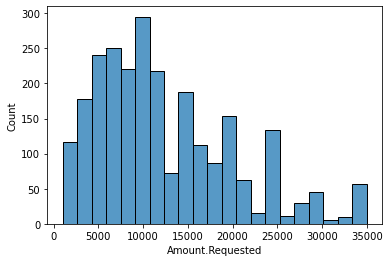

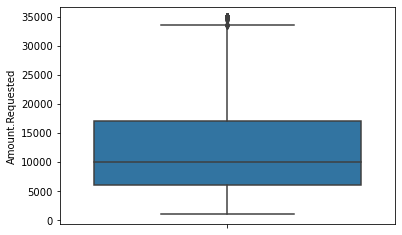

{'missing': 0, 'min': 1000.0, 'max': 35000.0, 'mean': 12405.46, 'var': 60861409.74, 'std': 7801.37, 'range': 34000.0, 'q1': 6000.0, 'q2': 10000.0, 'q3': 17000.0, 'skewness': 0.91, 'kurtosis': 0.31}
***************************************************************************
Interest.Rate


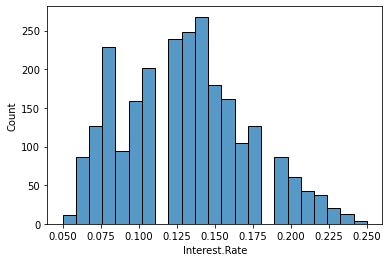

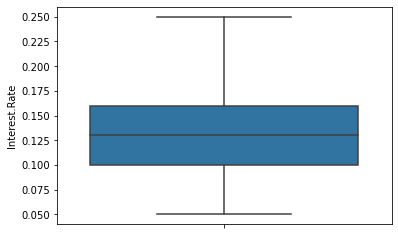

{'missing': 0, 'min': 0.05, 'max': 0.25, 'mean': 0.13, 'var': 0.0, 'std': 0.04, 'range': 0.2, 'q1': 0.1, 'q2': 0.13, 'q3': 0.16, 'skewness': 0.31, 'kurtosis': -0.41}
***************************************************************************
Loan.Length


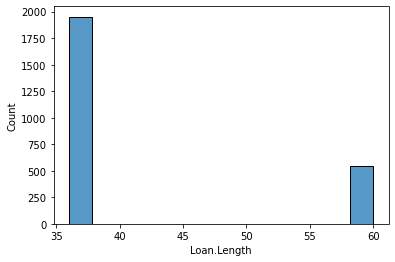

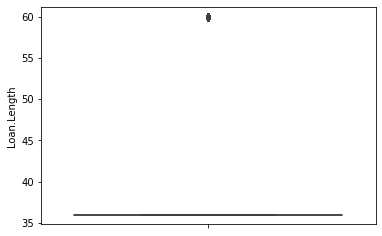

{'missing': 0, 'min': 36, 'max': 60, 'mean': 41.26, 'var': 98.62, 'std': 9.93, 'range': 24, 'q1': 36.0, 'q2': 36.0, 'q3': 36.0, 'skewness': 1.36, 'kurtosis': -0.16}
***************************************************************************
Debt.To.Income.Ratio


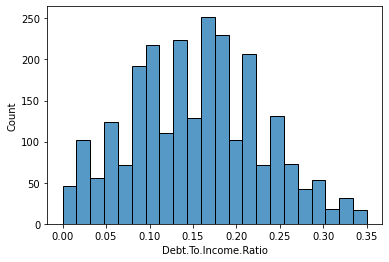

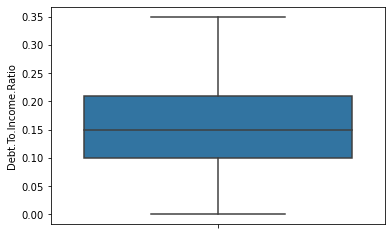

{'missing': 0, 'min': 0.0, 'max': 0.35, 'mean': 0.15, 'var': 0.01, 'std': 0.08, 'range': 0.35, 'q1': 0.1, 'q2': 0.15, 'q3': 0.21, 'skewness': 0.15, 'kurtosis': -0.51}
***************************************************************************
Monthly.Income


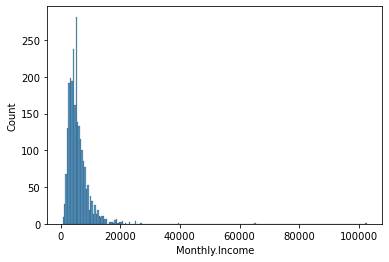

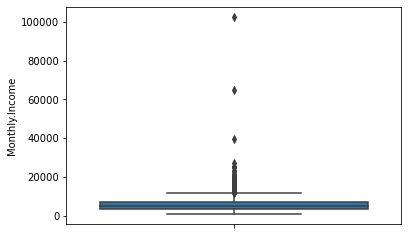

{'missing': 0, 'min': 588.5, 'max': 102750.0, 'mean': 5688.66, 'var': 15700210.56, 'std': 3962.35, 'range': 102161.5, 'q1': 3500.0, 'q2': 5000.0, 'q3': 6800.0, 'skewness': 8.47, 'kurtosis': 167.5}
***************************************************************************
CIBIL_Score


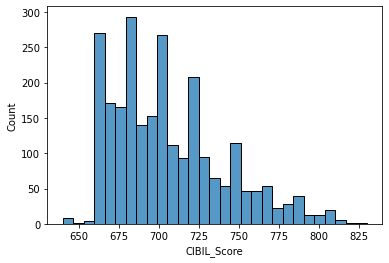

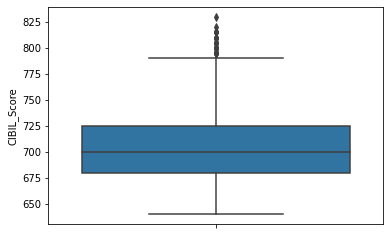

{'missing': 0, 'min': 640.0, 'max': 830.0, 'mean': 705.9, 'var': 1227.0, 'std': 35.03, 'range': 190.0, 'q1': 680.0, 'q2': 700.0, 'q3': 725.0, 'skewness': 0.82, 'kurtosis': 0.13}
***************************************************************************
Open.CREDIT.Lines


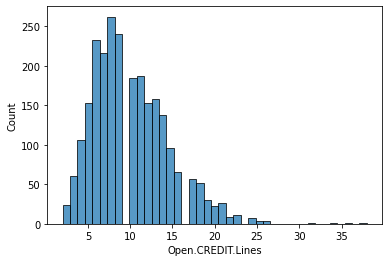

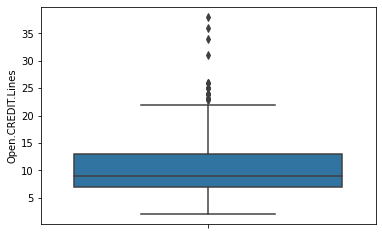

{'missing': 0, 'min': 2.0, 'max': 38.0, 'mean': 10.07, 'var': 20.29, 'std': 4.5, 'range': 36.0, 'q1': 7.0, 'q2': 9.0, 'q3': 13.0, 'skewness': 0.89, 'kurtosis': 1.47}
***************************************************************************
Revolving.CREDIT.Balance


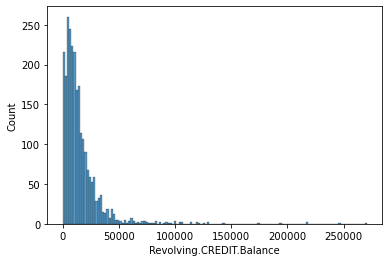

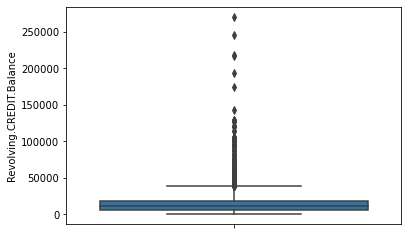

{'missing': 0, 'min': 0.0, 'max': 270800.0, 'mean': 15218.05, 'var': 333816238.84, 'std': 18270.64, 'range': 270800.0, 'q1': 5589.25, 'q2': 10948.0, 'q3': 18843.75, 'skewness': 5.41, 'kurtosis': 49.21}
***************************************************************************
Inquiries.in.the.Last.6.Months


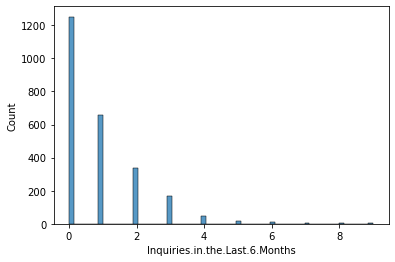

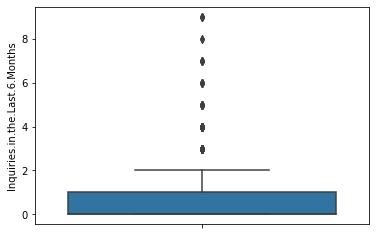

{'missing': 0, 'min': 0.0, 'max': 9.0, 'mean': 0.91, 'var': 1.51, 'std': 1.23, 'range': 9.0, 'q1': 0.0, 'q2': 0.0, 'q3': 1.0, 'skewness': 2.04, 'kurtosis': 6.55}
***************************************************************************


In [32]:
for columns in df.dtypes[df.dtypes !='object'].index:
    print(columns)
    print(univariate_num(df[columns]))
    print('*'*75)

In [33]:
f=df.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

In [34]:
f

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Amount.Requested,2500.0,12405.462185,7801.372299,1000.00,1500.0000,1900.00,2000.00,2500.00,2871.2500,6000.00,10000.00,17000.00,24000.00,28000.0000,30000.00,30000.0000,35000.00,35000.00,35000.00
Interest.Rate,2500.0,0.130380,0.041273,0.05,0.0600,0.06,0.06,0.07,0.0700,0.10,0.13,0.16,0.19,0.2000,0.21,0.2103,0.22,0.23,0.25
Loan.Length,2500.0,41.260800,9.930893,36.00,36.0000,36.00,36.00,36.00,36.0000,36.00,36.00,36.00,60.00,60.0000,60.00,60.0000,60.00,60.00,60.00
Debt.To.Income.Ratio,2500.0,0.153854,0.075088,0.00,0.0100,0.02,0.02,0.03,0.0300,0.10,0.15,0.21,0.25,0.2800,0.29,0.3000,0.31,0.33,0.35
Monthly.Income,2500.0,5688.655748,3962.349122,588.50,1416.5366,1666.67,1833.33,2000.00,2166.3365,3500.00,5000.00,6800.00,9292.83,11666.6865,12500.00,13389.9756,15000.00,18750.00,102750.00
CIBIL_Score,2500.0,705.900000,35.028571,640.00,660.0000,660.00,660.00,660.00,660.0000,680.00,700.00,725.00,755.00,775.0000,780.00,785.0000,795.00,805.00,830.00
Open.CREDIT.Lines,2500.0,10.071600,4.504863,2.00,3.0000,3.00,3.00,4.00,4.0000,7.00,9.00,13.00,16.00,18.0000,19.00,20.0000,21.00,23.00,38.00
Revolving.CREDIT.Balance,2500.0,15218.054400,18270.638709,0.00,0.0000,66.56,348.91,679.80,920.5500,5589.25,10948.00,18843.75,29976.50,40765.8500,43736.60,50338.8500,63301.04,92407.66,270800.00
Inquiries.in.the.Last.6.Months,2500.0,0.905600,1.230811,0.00,0.0000,0.00,0.00,0.00,0.0000,0.00,0.00,1.00,3.00,3.0000,3.00,4.0000,4.00,5.00,9.00


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revolving.CREDIT.Balance'>

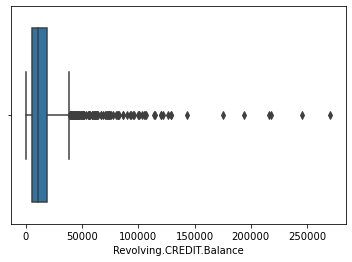

In [35]:
sns.boxplot(df['Revolving.CREDIT.Balance'])

In [36]:
df['Revolving.CREDIT.Balance'].quantile(.99)

92407.6599999998

In [37]:
ob_var=df.dtypes[df.dtypes=="object"].index

In [38]:
df_ob=df[ob_var]

In [39]:
num_var=df.dtypes[df.dtypes!="object"].index

In [40]:
df_num=df[num_var]

In [41]:
### Outlier Capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.98))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [42]:
df_num1=df_num.apply(outliers_percentile)

In [43]:
df_num1.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Amount.Requested,2500.0,12405.462185,7801.372299,1000.00,1500.0000,1900.00,2000.00,2500.00,2871.2500,6000.00,10000.00,17000.00,24000.00,28000.0000,30000.00,30000.0000,35000.0000,35000.00,35000.00
Interest.Rate,2500.0,0.130144,0.040703,0.05,0.0600,0.06,0.06,0.07,0.0700,0.10,0.13,0.16,0.19,0.2000,0.21,0.2103,0.2200,0.22,0.22
Loan.Length,2500.0,41.260800,9.930893,36.00,36.0000,36.00,36.00,36.00,36.0000,36.00,36.00,36.00,60.00,60.0000,60.00,60.0000,60.0000,60.00,60.00
Debt.To.Income.Ratio,2500.0,0.153438,0.074145,0.00,0.0100,0.02,0.02,0.03,0.0300,0.10,0.15,0.21,0.25,0.2800,0.29,0.3000,0.3100,0.31,0.31
Monthly.Income,2500.0,5552.309216,2891.757395,588.50,1416.5366,1666.67,1833.33,2000.00,2166.3365,3500.00,5000.00,6800.00,9292.83,11666.6865,12500.00,13389.9756,15000.0000,15000.00,15000.00
CIBIL_Score,2500.0,705.710000,34.497854,640.00,660.0000,660.00,660.00,660.00,660.0000,680.00,700.00,725.00,755.00,775.0000,780.00,785.0000,795.0000,795.00,795.00
Open.CREDIT.Lines,2500.0,10.016800,4.321758,2.00,3.0000,3.00,3.00,4.00,4.0000,7.00,9.00,13.00,16.00,18.0000,19.00,20.0000,21.0000,21.00,21.00
Revolving.CREDIT.Balance,2500.0,14346.128800,12896.215330,0.00,0.0000,66.56,348.91,679.80,920.5500,5589.25,10948.00,18843.75,29976.50,40765.8500,43736.60,50338.8500,63294.1408,63301.04,63301.04
Inquiries.in.the.Last.6.Months,2500.0,0.872000,1.095124,0.00,0.0000,0.00,0.00,0.00,0.0000,0.00,0.00,1.00,3.00,3.0000,3.00,4.0000,4.0000,4.00,4.00


In [44]:
df3=pd.concat([df_num1,df_ob],axis=1)

In [45]:
df3

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Purpose,Home.Ownership
0,20000.0,0.09,36,0.15,6541.67,735.0,14.0,14272.0,2.0,debt_consolidation,MORTGAGE
1,19200.0,0.12,36,0.28,4583.33,715.0,12.0,11140.0,1.0,debt_consolidation,MORTGAGE
2,35000.0,0.22,60,0.24,11500.00,690.0,14.0,21977.0,1.0,debt_consolidation,MORTGAGE
3,10000.0,0.10,36,0.14,3833.33,695.0,10.0,9346.0,0.0,debt_consolidation,MORTGAGE
4,12000.0,0.12,36,0.19,3195.00,695.0,11.0,14469.0,0.0,credit_card,RENT
...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.17,60,0.19,9250.00,705.0,15.0,45880.0,1.0,debt_consolidation,MORTGAGE
2496,16000.0,0.14,60,0.22,8903.25,740.0,18.0,18898.0,1.0,home_improvement,OWN
2497,10000.0,0.14,36,0.05,2166.67,680.0,4.0,4544.0,0.0,debt_consolidation,MORTGAGE
2498,6000.0,0.12,36,0.17,3500.00,675.0,8.0,7753.0,0.0,major_purchase,RENT


In [46]:
df3

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Purpose,Home.Ownership
0,20000.0,0.09,36,0.15,6541.67,735.0,14.0,14272.0,2.0,debt_consolidation,MORTGAGE
1,19200.0,0.12,36,0.28,4583.33,715.0,12.0,11140.0,1.0,debt_consolidation,MORTGAGE
2,35000.0,0.22,60,0.24,11500.00,690.0,14.0,21977.0,1.0,debt_consolidation,MORTGAGE
3,10000.0,0.10,36,0.14,3833.33,695.0,10.0,9346.0,0.0,debt_consolidation,MORTGAGE
4,12000.0,0.12,36,0.19,3195.00,695.0,11.0,14469.0,0.0,credit_card,RENT
...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.17,60,0.19,9250.00,705.0,15.0,45880.0,1.0,debt_consolidation,MORTGAGE
2496,16000.0,0.14,60,0.22,8903.25,740.0,18.0,18898.0,1.0,home_improvement,OWN
2497,10000.0,0.14,36,0.05,2166.67,680.0,4.0,4544.0,0.0,debt_consolidation,MORTGAGE
2498,6000.0,0.12,36,0.17,3500.00,675.0,8.0,7753.0,0.0,major_purchase,RENT


* converting categorical to numeric values

In [47]:
df3['Loan.Purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'moving', 'car',
       'vacation', 'home_improvement', 'house', 'major_purchase',
       'educational', 'medical', 'wedding', 'small_business',
       'renewable_energy'], dtype=object)

In [48]:
df3['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', nan], dtype=object)

In [49]:
df3['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [50]:
df3.dropna(subset=['Home.Ownership'],inplace=True)

In [51]:
df3['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [52]:
df3[df3['Home.Ownership']=='NONE']

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Purpose,Home.Ownership
366,5000.0,0.07,36,0.01,5000.0,795.0,9.0,10948.0,0.0,other,NONE


In [53]:
def none_treatment(x):
    if x!='NONE':
        return x
    else:
        return 'MORTGAGE'

* treating missing values in home ownership

In [54]:
df3['Home.Ownership']=df3['Home.Ownership'].apply(none_treatment)

In [55]:
df3['Home.Ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [56]:
df3['Home.Ownership'].value_counts()

MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
Name: Home.Ownership, dtype: int64

In [57]:
df3['Loan.Purpose'].nunique()

14

In [58]:
df3=pd.get_dummies(data=df3,columns=['Home.Ownership','Loan.Purpose'],drop_first=True)

In [59]:
df3

,Amount.Requested,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Home.Ownership_OTHER,...,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding
0,20000.0,0.09,36,0.15,6541.67,735.0,14.0,14272.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,0.12,36,0.28,4583.33,715.0,12.0,11140.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,0.22,60,0.24,11500.00,690.0,14.0,21977.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,0.10,36,0.14,3833.33,695.0,10.0,9346.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,0.12,36,0.19,3195.00,695.0,11.0,14469.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.17,60,0.19,9250.00,705.0,15.0,45880.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2496,16000.0,0.14,60,0.22,8903.25,740.0,18.0,18898.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
2497,10000.0,0.14,36,0.05,2166.67,680.0,4.0,4544.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2498,6000.0,0.12,36,0.17,3500.00,675.0,8.0,7753.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
df3.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding'],
      dtype='object')

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df3[['Amount.Requested',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values(by=["VIF"], ascending=False)

,feature,VIF
3,CIBIL_Score,11.942617
4,Open.CREDIT.Lines,8.518301
2,Monthly.Income,7.900245
1,Debt.To.Income.Ratio,7.087105
0,Amount.Requested,4.798698
5,Revolving.CREDIT.Balance,3.356222
6,Inquiries.in.the.Last.6.Months,1.655169


<AxesSubplot:xlabel='Interest.Rate', ylabel='Count'>

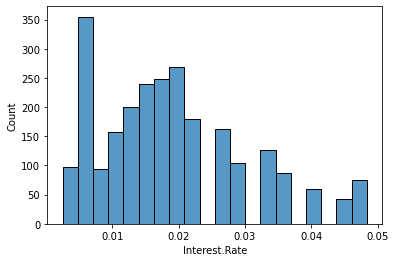

In [62]:
sns.histplot(np.square(df3['Interest.Rate']))

In [63]:
from scipy import stats

In [64]:
stats.shapiro(np.square(df['Interest.Rate']))

ShapiroResult(statistic=0.9239250421524048, pvalue=8.114682704500993e-34)

<AxesSubplot:xlabel='Interest.Rate', ylabel='Count'>

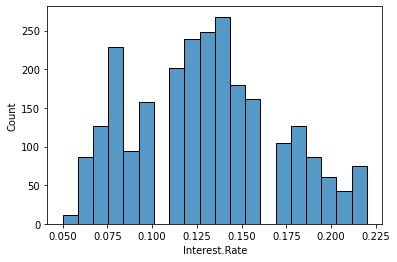

In [65]:
sns.histplot(df3['Interest.Rate'])

In [66]:
x=df3[['Amount.Requested',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'CIBIL_Score',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Home.Ownership_OTHER',
       'Home.Ownership_OWN', 'Home.Ownership_RENT', 'Loan.Purpose_credit_card',
       'Loan.Purpose_debt_consolidation', 'Loan.Purpose_educational',
       'Loan.Purpose_home_improvement', 'Loan.Purpose_house',
       'Loan.Purpose_major_purchase', 'Loan.Purpose_medical',
       'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding']]
y=df3[['Interest.Rate']]

In [67]:
x


,Amount.Requested,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT,...,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding
0,20000.0,0.15,6541.67,735.0,14.0,14272.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,0.28,4583.33,715.0,12.0,11140.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,0.24,11500.00,690.0,14.0,21977.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,0.14,3833.33,695.0,10.0,9346.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,0.19,3195.00,695.0,11.0,14469.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,0.19,9250.00,705.0,15.0,45880.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,16000.0,0.22,8903.25,740.0,18.0,18898.0,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2497,10000.0,0.05,2166.67,680.0,4.0,4544.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,6000.0,0.17,3500.00,675.0,8.0,7753.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [68]:
y

,Interest.Rate
0,0.09
1,0.12
2,0.22
3,0.10
4,0.12
...,...
2495,0.17
2496,0.14
2497,0.14
2498,0.12


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, 
                                                  random_state=0)

In [71]:
x_train

,Amount.Requested,Debt.To.Income.Ratio,Monthly.Income,CIBIL_Score,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT,...,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding
444,10000.0,0.17,8333.33,680.0,18.0,39461.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161,15000.0,0.19,4500.00,740.0,10.0,17212.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,7400.0,0.21,4166.25,675.0,17.0,6653.0,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
249,8000.0,0.13,3500.00,725.0,8.0,6834.0,2.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
989,16800.0,0.14,4000.00,660.0,12.0,12179.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,15000.0,0.17,4583.33,730.0,4.0,13115.0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1731,10550.0,0.19,5583.33,685.0,7.0,9533.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
763,17475.0,0.18,3333.33,730.0,15.0,17261.0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
835,5000.0,0.09,3750.00,745.0,12.0,3998.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
x_train=scaler.fit_transform(x_train)

In [75]:
x_test=scaler.transform(x_test)

In [76]:
regression=LinearRegression()

In [77]:
regression.fit(x_train,y_train)

LinearRegression()

In [78]:
print("Train R^2 : ", regression.score(x_train, y_train))

Train R^2 :  0.6972992090096308


In [79]:
print("Test R^2 : ", regression.score(x_test, y_test))

Test R^2 :  0.678257393941883


In [80]:
pred_test=regression.predict(x_test)

In [81]:
pred_train=regression.predict(x_train)

In [82]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE Interest.Rate    0.000504
dtype: float64
Train rmse Interest.Rate    0.022455
dtype: float64
Train MAE Interest.Rate    0.017757
dtype: float64
Train MAPE Interest.Rate    0.15049
dtype: float64


In [83]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE Interest.Rate    0.000522
dtype: float64
Test rmse Interest.Rate    0.022846
dtype: float64
Test MAE Interest.Rate    0.018299
dtype: float64
Test MAPE Interest.Rate    0.153211
dtype: float64
